## Optimierung mithilfe von Curve fitting

Curve fitting ist ein Verfahren zum Auffinden der am besten passenden Kurve für einen gegebenen Punkte-Set durch Minimieren der Summe der Quadrate der Offsets ("Residuals") der Punkte aus der Kurve.

<img src="images/curve_fitting_1.png" alt="Curve Fitting 1" style="width: 150px;"/>
<img src="images/curve_fitting_2.png" alt="Curve Fitting 2" style="width: 150px;"/>
<img src="images/curve_fitting_3.png" alt="Curve Fitting 3" style="width: 150px;"/>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def f(x):
    return x**2 + 10*np.sin(x)

In [14]:
x = np.linspace(-10, 10, 51)
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [15]:
y = f(x)
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

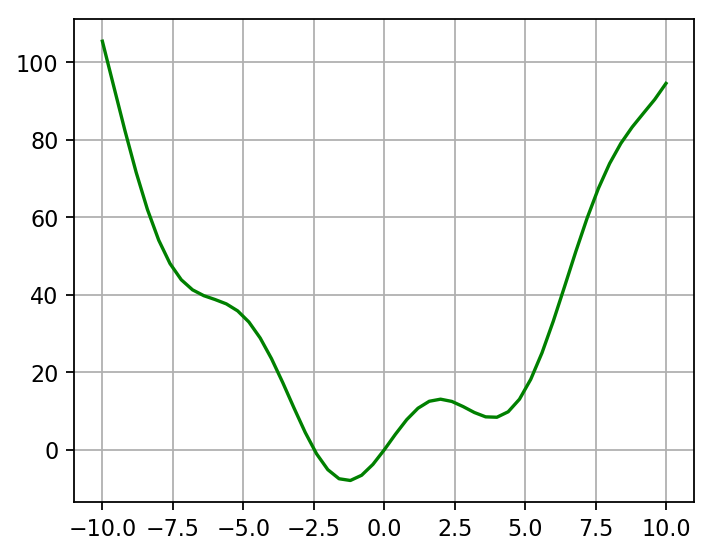

In [16]:
fig = plt.figure(figsize=(5, 4), dpi=160)
plt.plot(x, y, 'g-')
plt.grid()
plt.show()

In [17]:
y_noise = f(x) + 5 * np.random.randn(x.size)
y_noise

array([ 1.08343590e+02,  9.07015060e+01,  8.30311170e+01,  7.65960770e+01,
        5.96016005e+01,  5.34250320e+01,  5.04001935e+01,  4.67070766e+01,
        4.62482576e+01,  3.15684773e+01,  4.77452339e+01,  4.18826665e+01,
        3.88778833e+01,  3.11238674e+01,  2.81890229e+01,  2.33643193e+01,
        1.72495269e+01,  7.71284986e+00,  1.20882035e+01, -4.61012574e-03,
       -6.36824838e+00, -3.11399943e+00, -1.67371210e+01, -4.22884362e+00,
        3.41844013e+00,  9.37813866e+00, -2.30206324e+00,  4.27178136e+00,
        4.20271161e+00,  1.06599547e+01,  1.20416807e+01,  9.38845945e+00,
        5.12280118e+00,  7.64687849e+00,  7.87710275e+00,  1.69813026e+00,
        1.32570688e+01,  5.55495194e+00,  1.67681937e+01,  2.26703977e+01,
        4.18167432e+01,  4.22365979e+01,  5.23498289e+01,  5.71381841e+01,
        6.32824436e+01,  7.06028874e+01,  8.91600857e+01,  9.10105988e+01,
        7.81906354e+01,  9.84814288e+01,  8.80943776e+01])

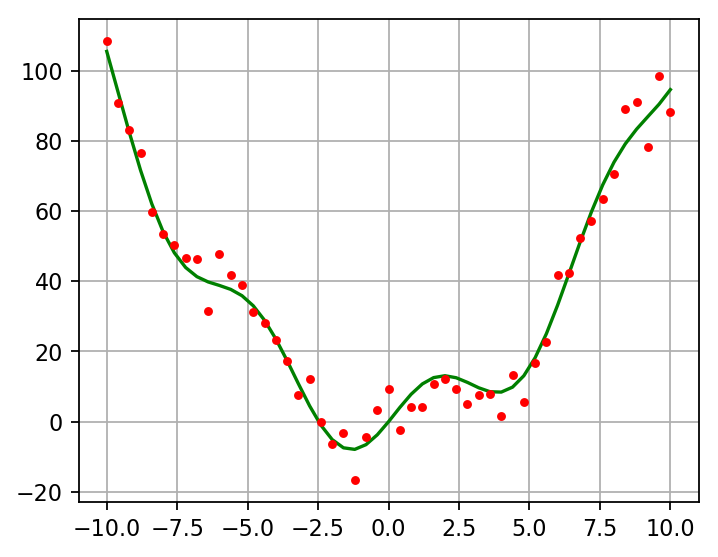

In [18]:
fig = plt.figure(figsize=(5, 4), dpi=160)
plt.plot(x, y, 'g-')
plt.plot(x, y_noise, 'r.')
plt.grid()
plt.show()

- Approximiere die Funktion $f_2(x)=ax^2+b\sin(x)$ indem wir die optimalen Werte für `a` and `b` ermitteln.

In [19]:
def f2(x, a, b):
    return a * x ** 2 + b * np.sin(x)

In [20]:
import scipy.optimize as opt

In [21]:
guess = [2,2] # start werte für a und b
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([1.00817719, 9.73420639])

In [22]:
a = params[0]
b = params[1]
y_fit = f2(x, a, b)
y_fit

array([106.11333264,  94.61054257,  83.16246082,  72.37953681,
        62.81814028,  54.89272271,  48.81038456,  44.53817867,
        41.80831186,  40.16042363,  39.01426692,  37.76131638,
        35.86084114,  32.92527433,  28.78140136,  23.4977067 ,
        17.37356169,  10.89196037,   4.64326537,  -0.7679974 ,
        -4.81858007,  -7.14912215,  -7.62088567,  -6.33765884,
        -3.62937017,   0.        ,   3.95198687,   7.62812564,
        10.52443598,  12.31098936,  12.88399758,  12.38219861,
        11.16495295,   9.75550845,   8.75839104,   8.76396333,
        10.25521938,  13.53153052,  18.66138123,  25.47155689,
        33.57449066,  42.42945166,  51.42791454,  59.98963225,
        67.65424427,  74.15395744,  79.45582458,  83.76694616,
        87.50177367,  91.21667684,  95.52210509])

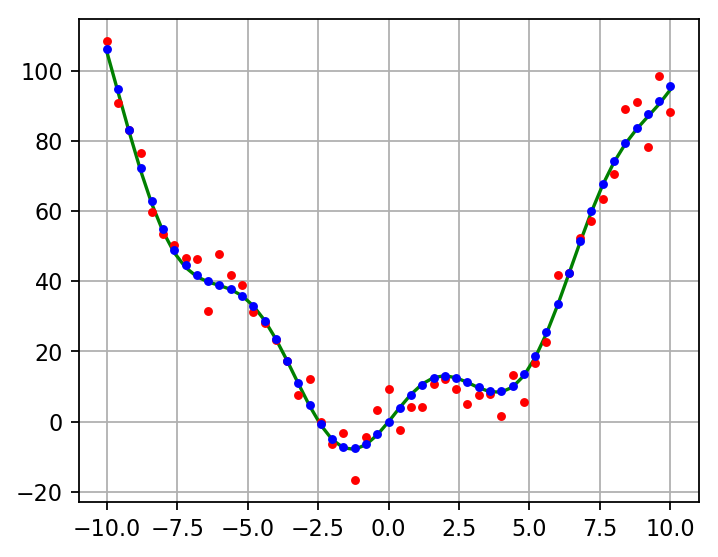

In [26]:
fig = plt.figure(figsize=(5, 4), dpi=160)
plt.plot(x, y, 'g-')
plt.plot(x, y_noise, 'r.')
plt.plot(x, y_fit, 'b.')
plt.grid()
plt.show()